In [ ]:

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train = X_train/255
X_test = X_test/255

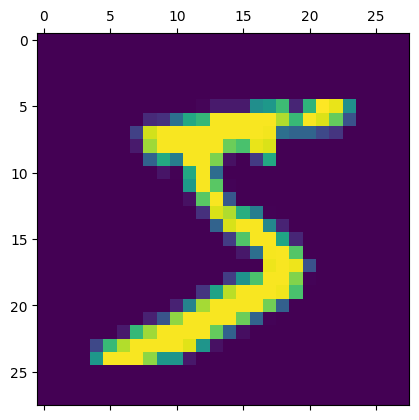

In [ ]:
plt.matshow(X_train[0])

In [ ]:
X_train_flatenned = X_train.reshape(len(X_train), 28*28)
X_test_flatenned = X_test.reshape(len(X_test), 28*28)

In [ ]:
X_test_flatenned.shape

(10000, 784)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)


model.fit(X_train_flatenned, y_train, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8132 - loss: 0.7249
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9131 - loss: 0.3127
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9210 - loss: 0.2852
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9235 - loss: 0.2762
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9272 - loss: 0.2639


In [ ]:
model.evaluate(X_test_flatenned, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9150 - loss: 0.3028


[0.266764760017395, 0.9259999990463257]

In [ ]:
plt.show()

In [ ]:
model.predict(X_test_flatenned)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[2.0027924e-02, 3.2809379e-07, 7.4894242e-02, ..., 9.9981183e-01,
        9.5421463e-02, 6.8468457e-01],
       [4.1370144e-01, 3.9332751e-03, 9.9954969e-01, ..., 1.0130540e-12,
        1.0638840e-01, 3.2145140e-09],
       [4.6089120e-04, 9.9308747e-01, 7.0359671e-01, ..., 1.1403706e-01,
        3.8625580e-01, 6.1368532e-02],
       ...,
       [6.9364046e-06, 3.9924562e-06, 2.1585035e-03, ..., 2.4298924e-01,
        4.5295611e-01, 8.3250338e-01],
       [1.5131281e-04, 1.1047721e-04, 3.3734055e-04, ..., 6.8708090e-05,
        7.0097655e-01, 7.6946846e-05],
       [1.2606540e-02, 3.3584507e-10, 3.3547175e-01, ..., 2.0363219e-08,
        1.8573186e-04, 6.1200120e-07]], dtype=float32)

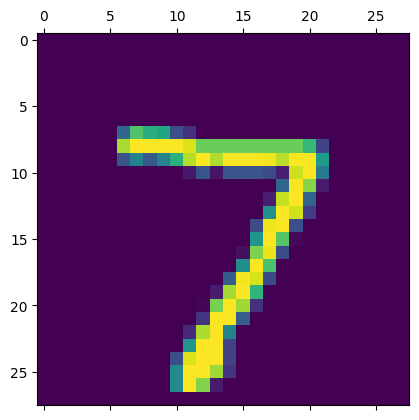

In [ ]:
# Show first image in training
plt.matshow(X_test[0])

In [ ]:
model.predict(X_test_flatenned)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([2.00279243e-02, 3.28093790e-07, 7.48942420e-02, 9.61950481e-01,
       2.78867339e-03, 1.06715426e-01, 1.40513293e-06, 9.99811828e-01,
       9.54214633e-02, 6.84684575e-01], dtype=float32)

In [ ]:
# maximum value in test
np.argmax(model.predict(X_test_flatenned)[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


7

In [ ]:
y_predicted = model.predict(X_test_flatenned)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)


Text(95.72222222222221, 0.5, 'Truth')

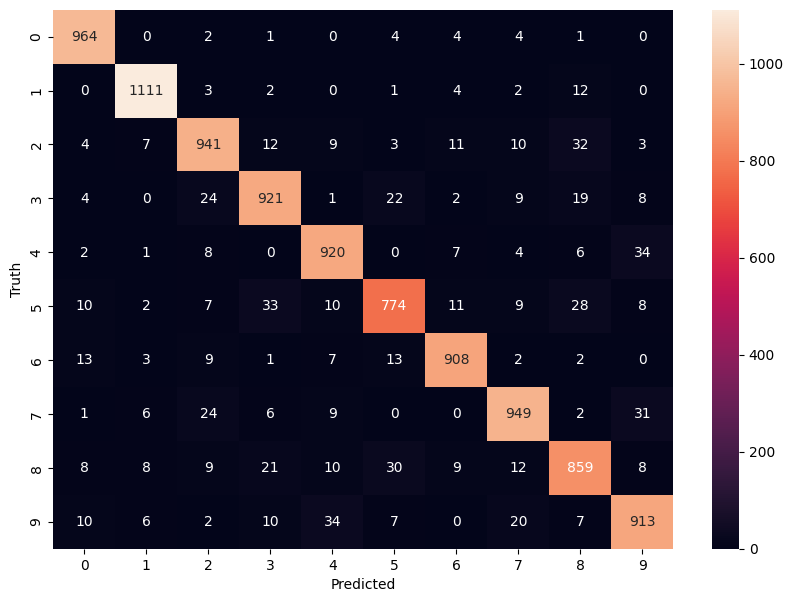

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# Adding layers to make it more efficient
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)


model.fit(X_train_flatenned, y_train, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8754 - loss: 0.4459
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9626 - loss: 0.1316
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9736 - loss: 0.0875
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9810 - loss: 0.0662
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9839 - loss: 0.0514


In [ ]:
model.evaluate(X_test_flatenned, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9704 - loss: 0.0905


[0.07702653110027313, 0.9758999943733215]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Text(95.72222222222221, 0.5, 'Truth')

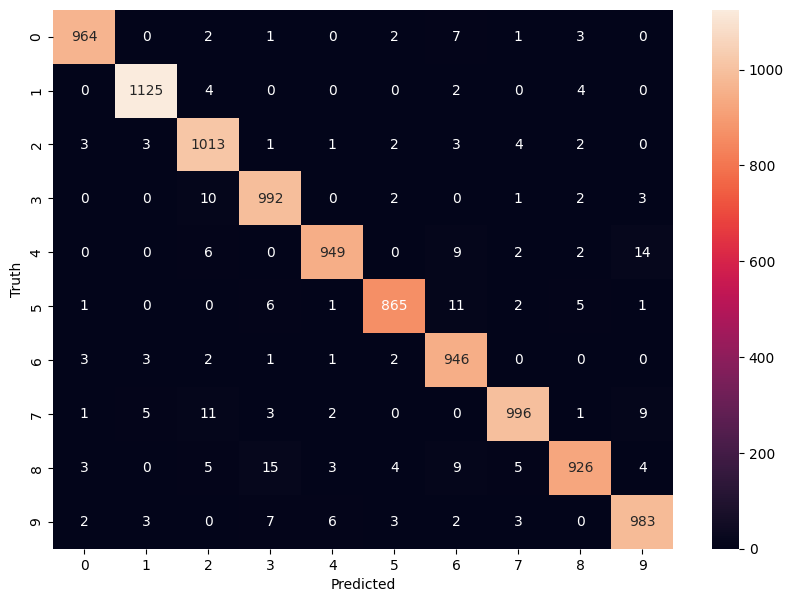

In [ ]:
y_predicted = model.predict(X_test_flatenned)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# using keras inbuilt feature to flatten the X_train

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)


model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8688 - loss: 0.4639
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9630 - loss: 0.1267
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9739 - loss: 0.0882
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9805 - loss: 0.0633
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9855 - loss: 0.0491
